<a href="https://colab.research.google.com/drive/1pY6TXtBEpJbyLC5llcvWKmXOgTInFeD5" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG 16 model

## Load the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


## Check if everything is working as intented

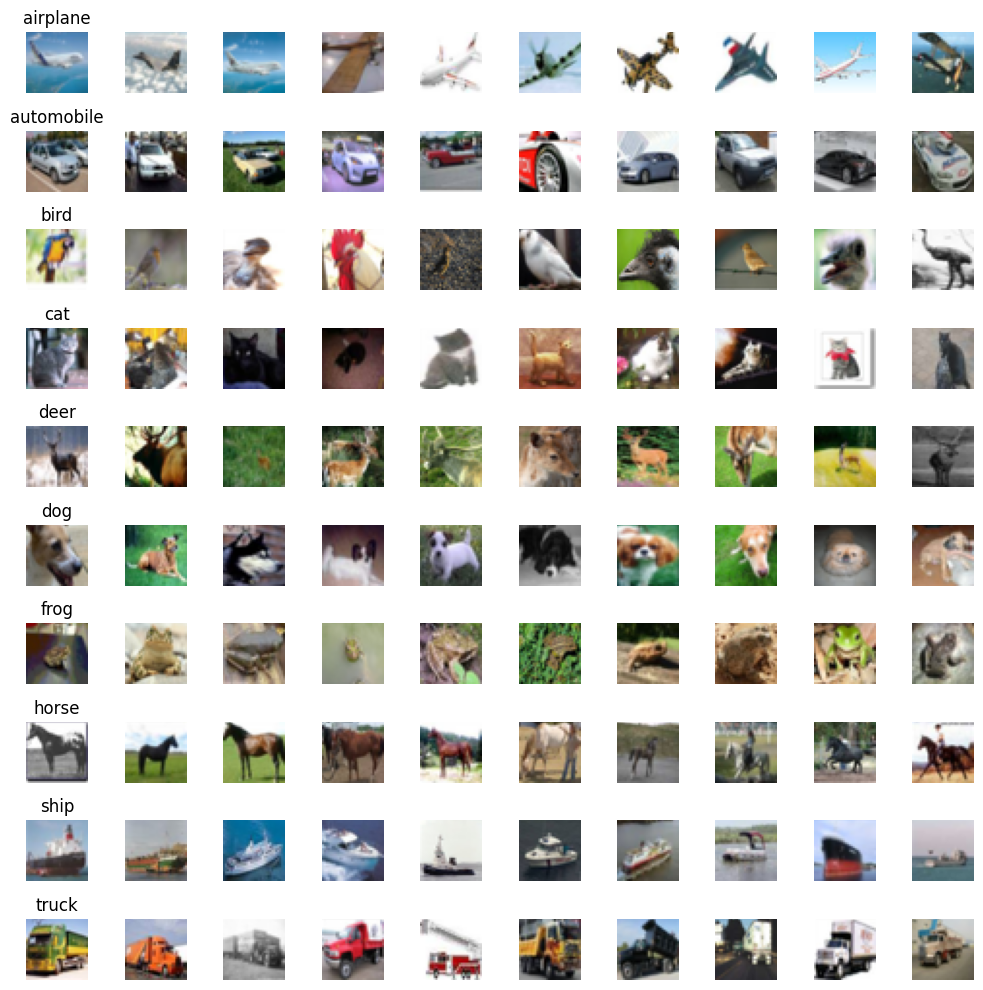

In [2]:
import matplotlib.pyplot as plt

# Classe names come from cifar10 dataset
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Show 10 random images for each class
plt.figure(figsize=(10, 10))
images = []
for class_idx in range(10):
    idxs = np.where(y_train.flatten() == class_idx)[0]
    selected = np.random.choice(idxs, 10, replace=False)
    for i, img_idx in enumerate(selected):
        plt.subplot(10, 10, class_idx * 10 + i + 1)
        plt.imshow(x_train[img_idx])
        images.append(x_train[img_idx])
        plt.axis('off')
        if i == 0:
            plt.title(class_names[class_idx])
plt.tight_layout()
plt.show()

### Convert classes to one-hot encoding

In [3]:
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


### Normalise images

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
print(x_test.shape)

## Create a Sequential model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model

In [6]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

### Create a model architecture

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Second convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,122 (3.11 MB)

 Trainable params: 814,122 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile the model using Adam optimizer

In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Early stopping callback: stop training if val_loss doesn't improve for 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model with early stopping
history = model.fit(
    x_train, y_train_onehot,
    epochs=30,
    batch_size=128,
    validation_data=(x_test, y_test_onehot),
    callbacks=[early_stop]
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.2523 - loss: 1.9938 - val_accuracy: 0.4947 - val_loss: 1.3907
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5026 - loss: 1.3624 - val_accuracy: 0.6058 - val_loss: 1.1266
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6119 - loss: 1.1067 - val_accuracy: 0.6855 - val_loss: 0.8914
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6620 - loss: 0.9625 - val_accuracy: 0.6851 - val_loss: 0.8982
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6961 - loss: 0.8698 - val_accuracy: 0.7312 - val_loss: 0.7811
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7207 - loss: 0.7981 - val_accuracy: 0.7552 - val_loss: 0.7082
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7399 - loss: 0.7417 - val_accuracy: 0.7641 - val_loss: 0.6814
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7576 - loss: 0.6854 - val_accuracy: 

### Evaluate the model on the test set

In [9]:
loss, accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5486
Test Accuracy: 0.8305


### Enhance accuracy

Since accuracy is low, we want to make it higher

In [10]:
# Reassign the patience for early_stop so we have more data to train
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train_onehot,
    epochs=200,  # Increased number of epochs
    batch_size=128,
    validation_data=(x_test, y_test_onehot),
    callbacks=[early_stop]
)

# Evaluate the model on the test set again after extended training
loss, accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8713 - loss: 0.3657 - val_accuracy: 0.8277 - val_loss: 0.5648
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8760 - loss: 0.3529 - val_accuracy: 0.8238 - val_loss: 0.5661
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8778 - loss: 0.3458 - val_accuracy: 0.8187 - val_loss: 0.5915
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8782 - loss: 0.3454 - val_accuracy: 0.8239 - val_loss: 0.5735
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8797 - loss: 0.3406 - val_accuracy: 0.8218 - val_loss: 0.6149
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8812 - loss: 0.3321 - val_accuracy: 0.8297 - val_loss: 0.5723
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8831 - loss: 0.3337 - val_accuracy: 0.8284 - val_loss: 0.5827
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8867 - loss: 0.3177 - val_accu

### Increase complexity and use data augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)

# Create a more complex model architecture
model = Sequential([
    # First convolutional block
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Second convolutional block
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Third convolutional block
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model using Adam optimizer with a slightly lower learning rate

In [12]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

# Early stopping callback: stop training if val_loss doesn't improve for 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the model with data augmentation and early stopping
history = model.fit(
    datagen.flow(x_train, y_train_onehot, batch_size=128),
    epochs=200,  # Increased number of epochs
    validation_data=(x_test, y_test_onehot),
    callbacks=[early_stop]
)

# Evaluate the model on the test set after training
loss, accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.2290 - loss: 2.0312 - val_accuracy: 0.4874 - val_loss: 1.3880
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.4611 - loss: 1.4658 - val_accuracy: 0.5675 - val_loss: 1.1783
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.5554 - loss: 1.2368 - val_accuracy: 0.6183 - val_loss: 1.0749
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.6112 - loss: 1.0836 - val_accuracy: 0.6800 - val_loss: 0.9191
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.6475 - loss: 0.9889 - val_accuracy: 0.6852 - val_loss: 0.8949
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.6805 - loss: 0.9082 - val_accuracy: 0.7093 - val_loss: 0.8388
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.7019 - loss: 0.8481 - val_accuracy: 0.7550 - val_loss: 0.6945
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.7221 - loss: 0.7910 - val_

### Plot training history

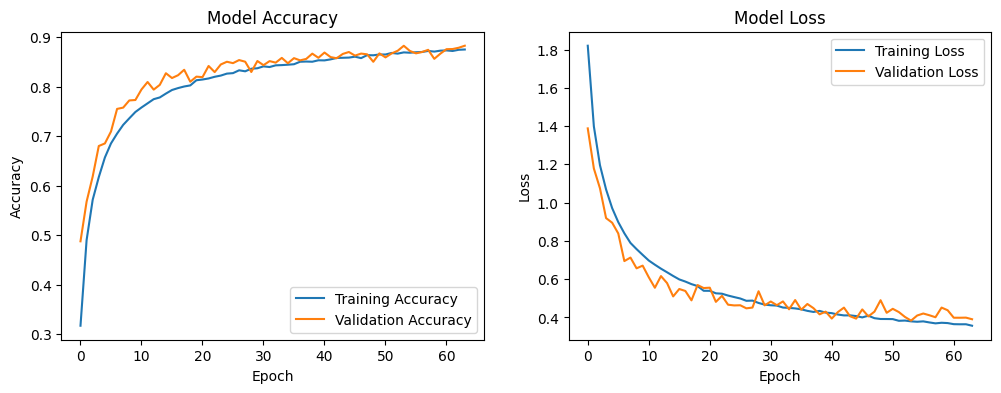

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Evaluate the trained model on a separate validation set.

In [14]:
# Load CIFAR-10 dataset to create a validation set
# Assuming x_train, y_train, x_test, y_test are already loaded from previous code
# Split the original test set into a validation set and a new test set
from sklearn.model_selection import train_test_split

# Assuming x_test and y_test are the original test sets
x_val, x_test_new, y_val, y_test_new = train_test_split(x_test, y_test_onehot, test_size=0.5, random_state=42)

print(f"Original test set shape: {x_test.shape}")
print(f"New test set shape: {x_test_new.shape}")
print(f"Validation set shape: {x_val.shape}")

# Now evaluate the trained model on the validation set
loss_val, accuracy_val = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation Loss: {loss_val:.4f}")
print(f"Validation Accuracy: {accuracy_val:.4f}")

# You can also evaluate on the new test set to see performance on unseen data
loss_test_new, accuracy_test_new = model.evaluate(x_test_new, y_test_new, verbose=0)
print(f"New Test Loss: {loss_test_new:.4f}")
print(f"New Test Accuracy: {accuracy_test_new:.4f}")

Original test set shape: (10000, 32, 32, 3)
New test set shape: (5000, 32, 32, 3)
Validation set shape: (5000, 32, 32, 3)
Validation Loss: 0.3860
Validation Accuracy: 0.8844
New Test Loss: 0.3803
New Test Accuracy: 0.8808


### Compute and report metrics

In [15]:
from sklearn.metrics import classification_report

# Get predictions for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Compute and print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

    airplane       0.89      0.89      0.89      1000
  automobile       0.93      0.96      0.94      1000
        bird       0.86      0.81      0.84      1000
         cat       0.85      0.69      0.76      1000
        deer       0.86      0.89      0.87      1000
         dog       0.85      0.82      0.84      1000
        frog       0.85      0.95      0.90      1000
       horse       0.90      0.94      0.92      1000
        ship       0.94      0.93      0.93      1000
       truck       0.88      0.95      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### Visualize the confusion matrix to understand model performance across different classes.

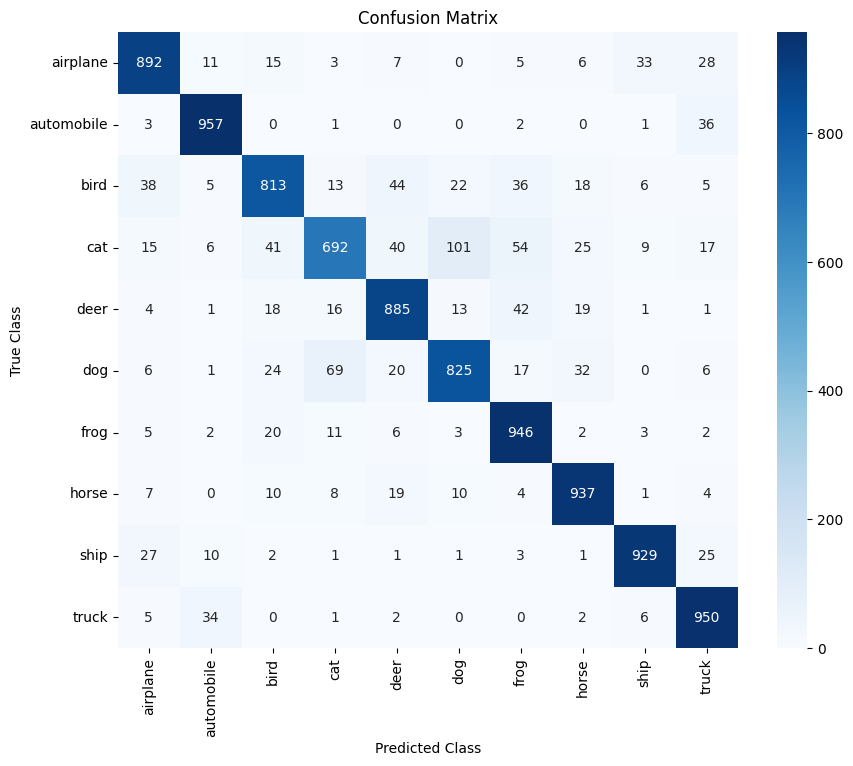

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()


## Evaluate the accuracy of the model with VGG16

In [17]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the VGG16 model with pre-trained weights on ImageNet
# We exclude the top (fully connected) layers so we can add our own
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the convolutional layers of VGG16 to prevent their weights from being updated during training
for layer in vgg16_base.layers:
    layer.trainable = False

# Create a new model on top of the VGG16 base and define the input layer
input_tensor = Input(shape=(32, 32, 3))

# Pass the input through the VGG16 base model
x = vgg16_base(input_tensor)

# Add our own classification layers
x = Flatten()(x)  # Flatten the output from the convolutional base
x = Dense(256, activation='relu')(x) # Add a dense layer with ReLU activation
x = Dropout(0.5)(x) # Add dropout for regularisation
output_tensor = Dense(10, activation='softmax')(x) # Add the output layer with softmax activation for 10 classes

# Create the final model
vgg16_model = Model(inputs=input_tensor, outputs=output_tensor)

# Compile the model
vgg16_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001), # Use Adam optimizer
    metrics=['accuracy']
)

vgg16_model.summary()

# Early stopping callback
early_stop_vgg16 = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train the VGG16 model
# We'll use the same data augmentation setup as before
history_vgg16 = vgg16_model.fit(
    datagen.flow(x_train, y_train_onehot, batch_size=128),
    epochs=100, # Train for a reasonable number of epochs
    validation_data=(x_test, y_test_onehot),
    callbacks=[early_stop_vgg16]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.3406 - loss: 1.8614 - val_accuracy: 0.5318 - val_loss: 1.3463
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.4922 - loss: 1.4530 - val_accuracy: 0.5518 - val_loss: 1.2825
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5127 - loss: 1.3839 - val_accuracy: 0.5633 - val_loss: 1.2532
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5278 - loss: 1.3491 - val_accuracy: 0.5707 - val_loss: 1.2233
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5384 - loss: 1.3222 - val_accuracy: 0.5837 - val_loss: 1.1994
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5380 - loss: 1.3109 - val_accuracy: 0.5880 - val_loss: 1.1775
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5482 - loss: 1.3027 - val_accuracy: 0.5858 - val_loss: 1.1768
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.5515 - loss: 1.2784 - val_

### Evaluate the VGG16 model on the test set

In [18]:
loss_vgg16, accuracy_vgg16 = vgg16_model.evaluate(x_test, y_test_onehot, verbose=0)
print(f"\nVGG16 Model Test Loss: {loss_vgg16:.4f}")
print(f"VGG16 Model Test Accuracy: {accuracy_vgg16:.4f}")

# Get predictions for the test set using the VGG16 model
y_pred_vgg16 = vgg16_model.predict(x_test)
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)

# Compute and print classification report for VGG16
print("\nVGG16 Model Classification Report:")
print(classification_report(y_true_classes, y_pred_classes_vgg16, target_names=class_names))


VGG16 Model Test Loss: 1.0709
VGG16 Model Test Accuracy: 0.6284
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

VGG16 Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.73      0.72      0.72      1000
  automobile       0.65      0.73      0.69      1000
        bird       0.63      0.47      0.54      1000
         cat       0.49      0.38      0.43      1000
        deer       0.59      0.53      0.56      1000
         dog       0.59      0.51      0.55      1000
        frog       0.57      0.77      0.66      1000
       horse       0.67      0.73      0.70      1000
        ship       0.78      0.72      0.75      1000
       truck       0.57      0.71      0.63      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



### Compute and visualize the confusion matrix for VGG16

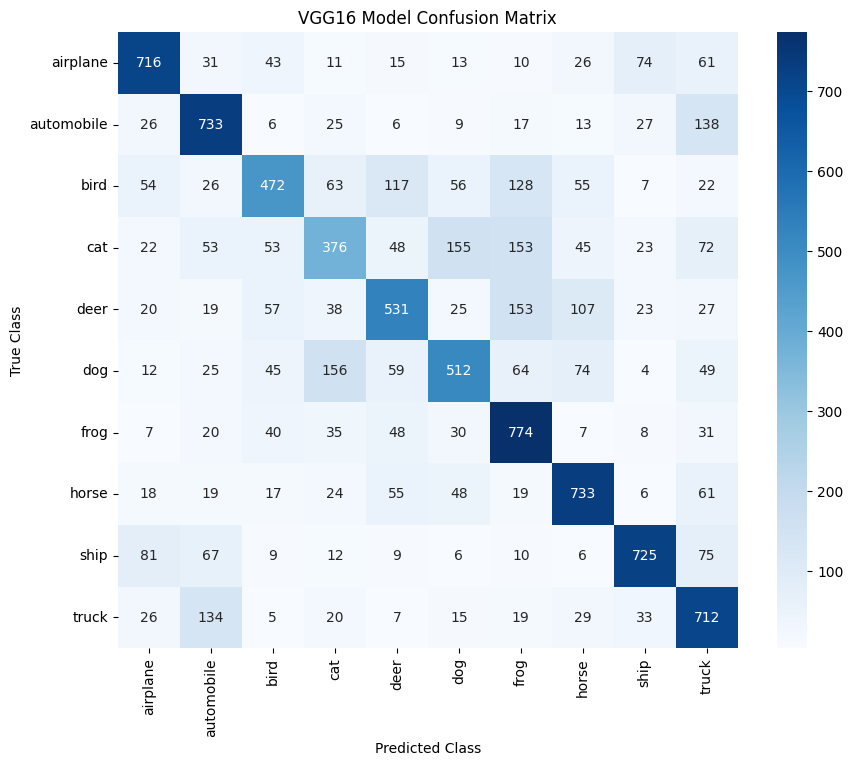

In [19]:
conf_matrix_vgg16 = confusion_matrix(y_true_classes, y_pred_classes_vgg16)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_vgg16, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('VGG16 Model Confusion Matrix')
plt.show()

## Save the model to a kiras file

In [21]:
vgg16_model.save("vgg16_julien.keras")

## Comments on the matrix

- Strong Performance: The high values along the diagonal indicate that the VGG16 model correctly classifies most images for several classes.
- Common Confusions: Off-diagonal values show which classes are often confused. For example, 'cat' and 'dog' are frequently misclassified as each other, which is expected due to their visual similarity.
- Challenging Classes: Some classes, such as 'frog', 'deer', and 'bird', may have more misclassifications, possibly due to less distinctive features or similarities with other animals.
- Well-Separated Classes: Classes like 'airplane', 'ship', and 'automobile' tend to have fewer confusions, likely because their features are more distinct.
- Improvement Areas: The model could benefit from further fine-tuning, more data augmentation, or class-specific strategies to reduce confusion between visually similar categories.

The VGG16 model achieves good classification accuracy on CIFAR-10, but there is still room for improvement, especially for classes that are visually similar. The confusion matrix is a valuable tool for identifying these weaknesses and guiding further model enhancements.